In [127]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)
from scipy.stats import norm


Title: Annual Surface Temperature Change Analysis

Developed by: Abeba Bade 

 # Introduction
This project explores annual surface temperature changes using the "Annual_Surface_Temperature_Change.csv" dataset. The dataset provides historical temperature data, and some of the objectives of this projectto analyze trends and patterns in surface temperature changes in the past 61 years (1961-2022) by answeing the following EDA hypothesises. 

### EDA Hypotheses

1.  Is there a consistent trend in temperature change over the past six decades, and if so, in what direction (warming or cooling)?

As someone who has seen a friend's house affected by rising sea levels, the question of consistent temperature trends over six decades is personally significant. It helps explain the causes behind sea-level rise, informs advocacy for climate action, aids in community preparedness, and provides context to personal experiences and emotions tied to climate change's impact.

2. Which county experienced the most significant temperature increase and which one experienced the most significant decrease during this time frame?

3. What are the top 20 countries with the highest average temperature change in the past 61 years (1961-20222)? 

Personally, I find it essential to explore the top 20 countries with the highest average temperature change. It underscores the global impact of climate change, raises awareness about environmental consequences, and highlights the need for international cooperation. This knowledge motivates me to make informed choices and support sustainability efforts in my daily life.

Additionally, I raised this question becasue I am curious to see if small islands highly affected by rising sea levels, such as the Maldives and East Timor, were included in the list of countries with the highest average temperature change.

In [128]:
# Import Dataset with the minimum requirements

df = pd.read_csv('Annual_Surface_Temperature_Change.csv')

display(df.head(3),print('Annual_Surface_Temperature_Change'))

Annual_Surface_Temperature_Change


,ObjectId,Country,ISO2,ISO3,Indicator,Unit,Source,CTS_Code,CTS_Name,CTS_Full_Descriptor,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,2,Albania,AL,ALB,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,3,Algeria,DZ,DZA,Temperature change with respect to a baseline ...,Degree Celsius,Food and Agriculture Organization of the Unite...,ECCS,Surface Temperature Change,"Environment, Climate Change, Climate Indicator...",...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688


None

# Review Data

In [129]:
# the shape of the dataset
print("Dataset shape: ", df.shape)

Dataset shape:  (225, 72)


In [130]:
# Data types of each columns 
column_data_types = df.dtypes 

#  Count the categorical and numerical columns 
Catagorical_columns = (column_data_types == 'object').sum()
numerical_columns = (column_data_types != 'object').sum()

print('number of catagorical_columns:', Catagorical_columns)
print('number of numerical_columns:' , numerical_columns)

number of catagorical_columns: 9
number of numerical_columns: 63


In [131]:
df.dtypes

ObjectId       int64
Country       object
ISO2          object
ISO3          object
Indicator     object
              ...   
F2018        float64
F2019        float64
F2020        float64
F2021        float64
F2022        float64
Length: 72, dtype: object

In [134]:
# Display information about df
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 72 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ObjectId             225 non-null    int64  
 1   Country              225 non-null    object 
 2   ISO2                 223 non-null    object 
 3   ISO3                 225 non-null    object 
 4   Indicator            225 non-null    object 
 5   Unit                 225 non-null    object 
 6   Source               225 non-null    object 
 7   CTS_Code             225 non-null    object 
 8   CTS_Name             225 non-null    object 
 9   CTS_Full_Descriptor  225 non-null    object 
 10  F1961                188 non-null    float64
 11  F1962                189 non-null    float64
 12  F1963                188 non-null    float64
 13  F1964                188 non-null    float64
 14  F1965                188 non-null    float64
 15  F1966                192 non-null    flo

# Perform EDA & visualization (25 pts):

In [81]:
# Extracting columns
columns_to_extract = ['Country'] + [f'F{i}' for i in range(1961, 2023)]  # List of numeric columns
subset_df = df[columns_to_extract]
display(subset_df.head(6))


,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
3,American Samoa,0.079,-0.042,0.169,-0.140,-0.562,0.181,-0.368,-0.187,0.132,...,1.257,1.170,1.009,1.539,1.435,1.189,1.539,1.430,1.268,1.256
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,Angola,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212


# Checking Outliers

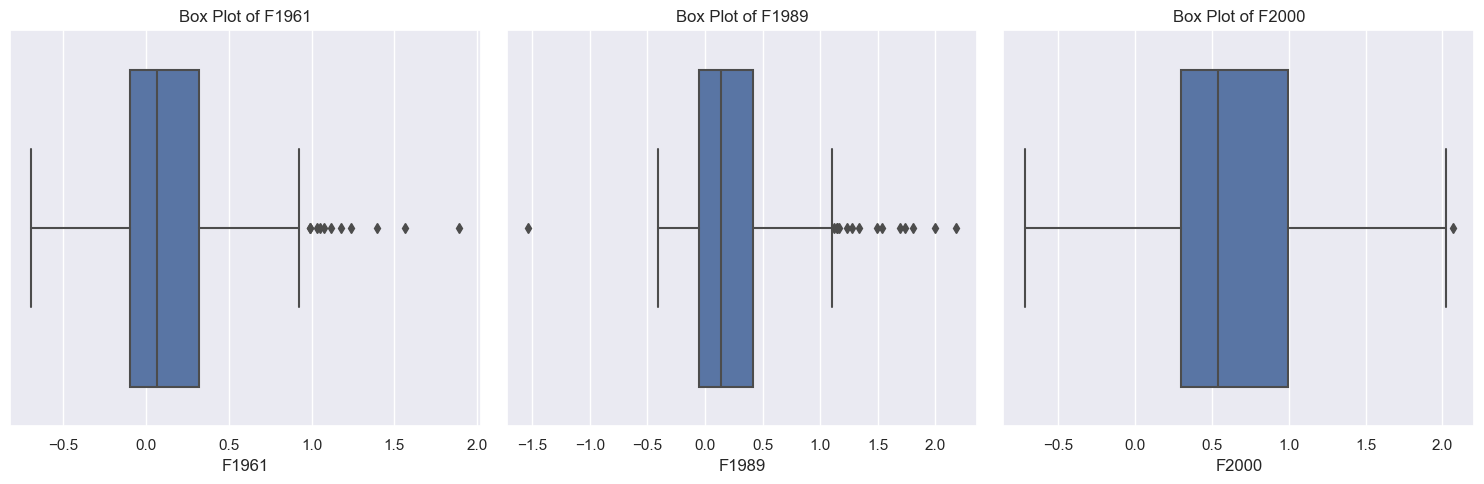

In [160]:
# to investigate annual Temperature change in F1961, F1989, F2000 in subset_df
quantitative_vars = ['F1961', 'F1989', 'F2000']

# Create subplots for box plots
fig, axes = plt.subplots(nrows=1, ncols=len(quantitative_vars), figsize=(15, 5))

# Loop through quantitative variables and create box plots
for i, var in enumerate(quantitative_vars):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f'Box Plot of {var}')

# Show the plots
plt.tight_layout()
plt.show()



In [161]:

# Initialize a dictionary to store the number of outliers for quantitative_vars(F1961, F1989, F2000) 
outlier_counts = {}

# Loop through the quantitative variables and calculate the number of outliers for each years
for var in quantitative_vars:
    # Calculating the IQR 
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define the outlier threshold
    lower_threshold = Q1 - 1.5 * IQR
    upper_threshold = Q3 + 1.5 * IQR
    
    # Count the number of outliers
    outliers = df[(df[var] < lower_threshold) | (df[var] > upper_threshold)]
    num_outliers = len(outliers)
    
    # Store the number 
    outlier_counts[var] = num_outliers

# Display the number of outliers for each years 
for var, count in outlier_counts.items():
    print(f'Number of outliers in {var}: {count}')


Number of outliers in F1961: 11
Number of outliers in F1989: 15
Number of outliers in F2000: 1


In [162]:
# Check for duplicate rows
duplicates = subset_df.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [163]:
# Check for NaN values in each column
nan_counts = subset_df.isna().sum()

# Print the number of NaN values for each column
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
Country     0
F1961      37
F1962      36
F1963      37
F1964      37
           ..
F2018      12
F2019      12
F2020      13
F2021      12
F2022      12
Length: 63, dtype: int64


In [164]:
#remove NaN values from the dataset 
filtered_subset_df = subset_df.dropna()
display(filtered_subset_df.head(6),print("filtered_subset_df:\n"))

filtered_subset_df:



,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Afghanistan, Islamic Rep. of",-0.113,-0.164,0.847,-0.764,-0.244,0.226,-0.371,-0.423,-0.539,...,1.281,0.456,1.093,1.555,1.540,1.544,0.910,0.498,1.327,2.012
1,Albania,0.627,0.326,0.075,-0.166,-0.388,0.559,-0.074,0.081,-0.013,...,1.333,1.198,1.569,1.464,1.121,2.028,1.675,1.498,1.536,1.518
2,Algeria,0.164,0.114,0.077,0.250,-0.100,0.433,-0.026,-0.067,0.291,...,1.192,1.690,1.121,1.757,1.512,1.210,1.115,1.926,2.330,1.688
4,"Andorra, Principality of",0.736,0.112,-0.752,0.308,-0.490,0.415,0.637,0.018,-0.137,...,0.831,1.946,1.690,1.990,1.925,1.919,1.964,2.562,1.533,3.243
5,Angola,0.041,-0.152,-0.190,-0.229,-0.196,0.175,-0.081,-0.193,0.188,...,1.044,0.828,1.331,1.609,0.870,1.395,1.752,1.162,1.553,1.212
6,Anguilla,0.086,-0.024,0.234,0.189,-0.365,-0.001,-0.257,-0.200,0.317,...,0.770,0.814,1.051,1.125,0.960,0.664,0.843,1.224,0.893,0.839


None

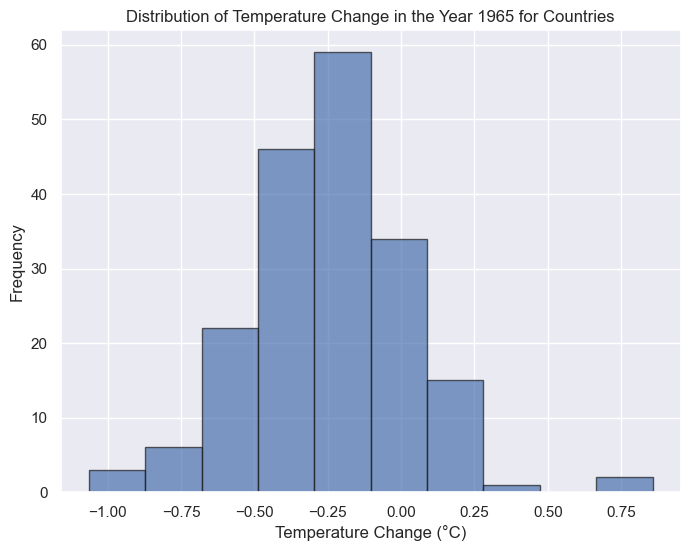

In [165]:
# Set the figure size
plt.figure(figsize=(8, 6))

# Create a histogram for the year 1997
plt.hist(subset_df['F1965'], bins=10, edgecolor='k', alpha=0.7)

# Add labels and title
plt.xlabel('Temperature Change (°C)')
plt.ylabel('Frequency')
plt.title('Distribution of Temperature Change in the Year 1965 for Countries')

# Show the histogram
plt.show()


Temperature changes primarily cluster between -1 and 0.5°C, forming a symmetric distribution with the peak between -0.313 and -0.125°C. Approximately 52 countries are included in -0.313 and -0.125°C temperature change range, An outlier affecting approximately 2 countries, deviate significantly, exhibiting temperature shifts in the narrow range of 0.655 to 0.875°C. These outliers represent exceptional temperature fluctuations within the dataset. 

# Question 1:
Is there a consistent trend in temperature change over the past six decades, and if so, in what direction (warming or cooling)?

In [166]:
# Decade Temperature change,every 10 years
subset_years = range(1961, 2023, 10)
subset_df_decade = subset_df[['Country'] + [f'F{i}' for i in subset_years]]
display(subset_df_decade.head(6))

,Country,F1961,F1971,F1981,F1991,F2001,F2011,F2021
0,"Afghanistan, Islamic Rep. of",-0.113,0.619,0.483,-0.168,1.311,1.397,1.327
1,Albania,0.627,-0.195,-0.351,-0.269,1.532,1.055,1.536
2,Algeria,0.164,-0.385,0.215,0.031,1.856,1.398,2.330
3,American Samoa,0.079,-0.477,0.179,0.641,0.904,0.854,1.268
4,"Andorra, Principality of",0.736,-0.326,0.178,0.231,1.480,1.677,1.533
5,Angola,0.041,-0.097,-0.071,0.341,0.295,0.880,1.553


In [167]:
# Check for duplicate rows
duplicates = subset_df_decade.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()

# Print the number of duplicates
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [168]:
# Check for NaN values in each column
nan_counts = subset_df_decade.isna().sum()

# Print the number of NaN values for each column
print("NaN counts for each column:")
print(nan_counts)

NaN counts for each column:
Country     0
F1961      37
F1971      34
F1981      34
F1991      37
F2001      17
F2011       8
F2021      12
dtype: int64


In [169]:
#remove NaN values from the dataset 
filtered_subset_df_decade = subset_df_decade.dropna()
display(filtered_subset_df_decade.head(6),print("Filtered Decade Temperature change:\n"))


Filtered Decade Temperature change:



,Country,F1961,F1971,F1981,F1991,F2001,F2011,F2021
0,"Afghanistan, Islamic Rep. of",-0.113,0.619,0.483,-0.168,1.311,1.397,1.327
1,Albania,0.627,-0.195,-0.351,-0.269,1.532,1.055,1.536
2,Algeria,0.164,-0.385,0.215,0.031,1.856,1.398,2.330
3,American Samoa,0.079,-0.477,0.179,0.641,0.904,0.854,1.268
4,"Andorra, Principality of",0.736,-0.326,0.178,0.231,1.480,1.677,1.533
5,Angola,0.041,-0.097,-0.071,0.341,0.295,0.880,1.553


None

In [170]:
#summary statisitcs for temperature record for the year of 2020

summary_stat= filtered_subset_df_decade.describe()
display(summary_stat.head(10))


,F1961,F1971,F1981,F1991,F2001,F2011,F2021
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,0.180911,-0.197509,0.162941,0.372852,0.796775,0.816178,1.336988
std,0.416618,0.240274,0.326041,0.298903,0.420911,0.398393,0.509267
min,-0.694000,-0.870000,-0.909000,-0.700000,-0.186000,-0.478000,-0.425000
25%,-0.095000,-0.326000,0.022000,0.197000,0.513000,0.539000,0.999000
50%,0.069000,-0.193000,0.176000,0.393000,0.691000,0.765000,1.304000
75%,0.334000,-0.060000,0.370000,0.542000,1.146000,1.060000,1.656000
max,1.892000,0.684000,1.562000,1.138000,1.992000,1.698000,2.676000


In [171]:
# Calculate yearly averages across all counties
decade_averages_Tem_change = filtered_subset_df_decade.loc[:, 'F1961':'F2022'].mean(axis=0)
display(decade_averages_Tem_change)

F1961    0.180911
F1971   -0.197509
F1981    0.162941
F1991    0.372852
F2001    0.796775
F2011    0.816178
F2021    1.336988
dtype: float64

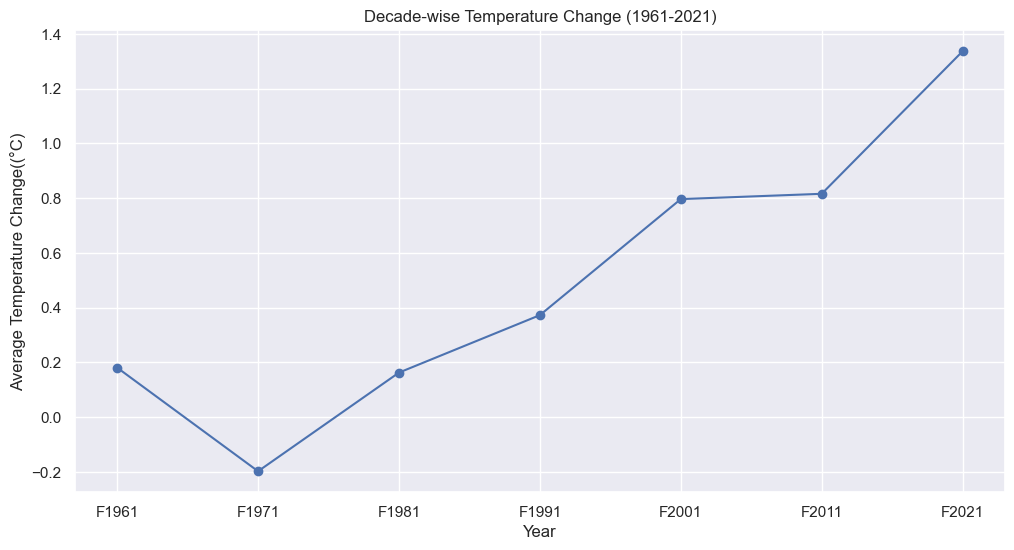

In [172]:
# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(decade_averages_Tem_change.index,decade_averages_Tem_change.values, marker='o', linestyle='-')
plt.title('Decade-wise Temperature Change (1961-2021)')
plt.xlabel('Year')
plt.ylabel('Average Temperature Change((°C)')
plt.grid(True)
# Show the plot
plt.show()

The Decade-wise Temperature Change (1961-2021 shows a gradual warming trend over the decades, with some fluctuations. Notable periods include slight cooling in the 1970s and a rapid temperature rise in recent years.
This warming trend aligns with global climate change patterns.

# Question 2: 
Which county experienced the most significant temperature increase and which one experienced the most significant decrease during this time frame?

In [173]:
# Calculate temperature change for each country
filtered_subset_df_decade['TemperatureChange'] = filtered_subset_df_decade['F2021'] - filtered_subset_df_decade['F1961']

# Find the country with the highest temperature increase
max_increase_country = filtered_subset_df_decade[filtered_subset_df_decade['TemperatureChange'] == filtered_subset_df_decade['TemperatureChange'].max()]['Country'].values[0]

# Find the country with the highest temperature decrease
max_decrease_country = filtered_subset_df_decade[filtered_subset_df_decade['TemperatureChange'] == filtered_subset_df_decade['TemperatureChange'].min()]['Country'].values[0]

print("Country with the Most Significant Temperature Increase:", max_increase_country)
print("Country with the Most Significant Temperature Decrease:", max_decrease_country)


Country with the Most Significant Temperature Increase: Bahrain, Kingdom of
Country with the Most Significant Temperature Decrease: Botswana


/var/folders/__/ynsz26dj57lfk90wfc3sqjh80000gp/T/ipykernel_16048/3858640625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_subset_df_decade['TemperatureChange'] = filtered_subset_df_decade['F2021'] - filtered_subset_df_decade['F1961']


In [174]:
#to extract Bahrain, Kingdom of'and 'Botswana from Country column
desired_countries = ['Bahrain, Kingdom of', 'Botswana']

# Create a subset DataFrame with the selected countries and temperature columns
Countries_df = df[df['Country'].isin(desired_countries)][['Country'] + [f'F{i}' for i in range(1961, 2023)]]

# Reset the index of the subset DataFrame
Countries_df.reset_index(drop=True, inplace=True)

# Print the subset DataFrame to verify the extraction
display(Countries_df.head())


,Country,F1961,F1962,F1963,F1964,F1965,F1966,F1967,F1968,F1969,...,F2013,F2014,F2015,F2016,F2017,F2018,F2019,F2020,F2021,F2022
0,"Bahrain, Kingdom of",-0.471,0.397,0.635,-0.561,0.234,0.535,-0.362,-0.446,0.567,...,1.403,1.694,2.240,1.598,2.080,2.247,2.108,2.027,2.464,2.017
1,Botswana,0.151,0.262,-0.472,-0.057,0.098,0.436,-0.458,-0.195,0.197,...,0.770,-0.092,1.546,1.469,0.017,0.734,1.525,0.493,-0.425,-1.305


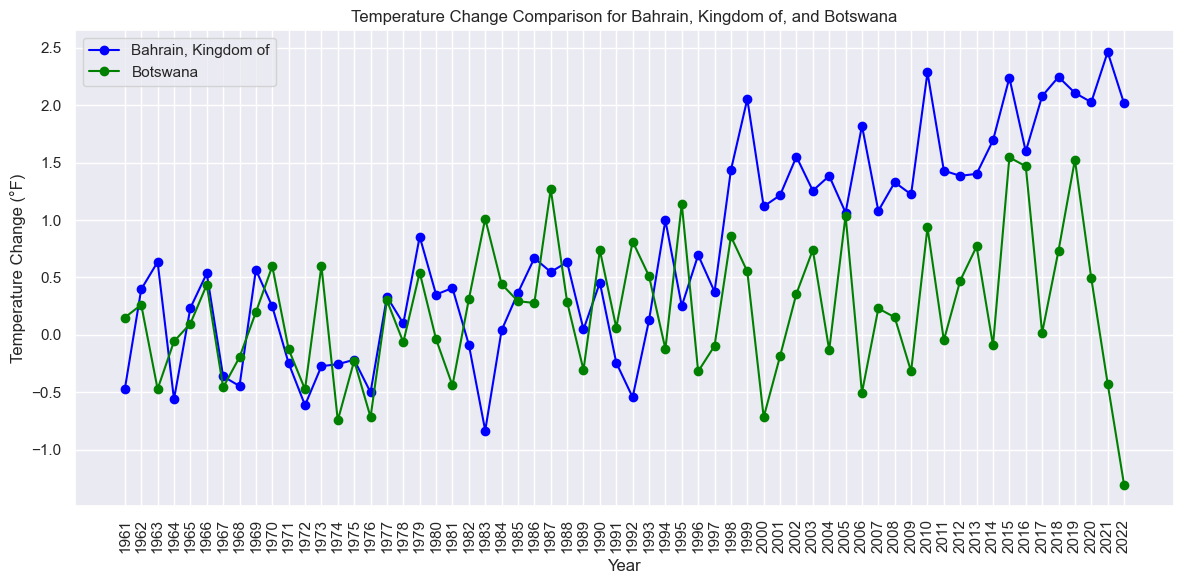

In [175]:
# Extract data for plotting
years = np.arange(1961, 2023)
temperature_changes_bahrain = Countries_df.loc[0, 'F1961':'F2022'].values
temperature_changes_botswana = Countries_df.loc[1, 'F1961':'F2022'].values

# Create a line plot to visualize temperature changes by year for both countries 
plt.figure(figsize=(12, 6))

# Plot temperature changes for Bahrain, Kingdom of
plt.plot(years, temperature_changes_bahrain, label='Bahrain, Kingdom of', marker='o', linestyle='-', color='blue')

# Create a line plot temperature changes for Botswana
plt.plot(years, temperature_changes_botswana, label='Botswana', marker='o', linestyle='-', color='green')


plt.xlabel('Year')
plt.ylabel('Temperature Change (°F)')
plt.title('Temperature Change Comparison for Bahrain, Kingdom of, and Botswana')
plt.xticks(years, rotation=90)
plt.legend()

plt.tight_layout()
plt.grid(True)
plt.show()


Both Bahrain, Kingdom of, and Botswana experienced an overall trend of temperature increase from 1961 to 2022.
Fluctuations in temperature changes were observed from year to year, with occasional deviations between the two countries.
Notable divergence occurred in the mid-1990s when Botswana saw a significant temperature decrease while Bahrain, Kingdom of, saw an increase.
Further analysis and investigation may be needed to understand specific temperature anomalies and their causes.
This summary captures the key trends and variations in the temperature data for the two countries.

In [154]:
# Calculate Average temperature change for each country
Countries_df['Temperature_Change'] = subset_df['F2022'] - subset_df['F1961']

# Display the DataFrame with temperature changes
display(Countries_df[['Country', 'Temperature_Change']])


,Country,Temperature_Change
0,"Bahrain, Kingdom of",2.125
1,Botswana,0.891


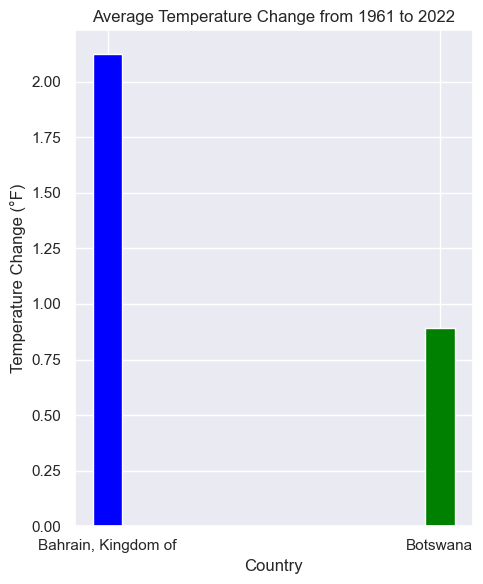

In [155]:
# Create a bar plot to visualize temperature 
plt.figure(figsize=(5, 6))

# Extract data for plotting
countries = Countries_df['Country']
temperature_changes = Countries_df['Temperature_Change']

# Define colors for the bars
colors = ['blue', 'green']

# Adjust the width of the bars
bar_width = 0.09 

# Create the bar plot with the specified bar width
plt.bar(countries, temperature_changes, color=colors, width=bar_width)
plt.xlabel('Country')
plt.ylabel('Temperature Change (°F)')
plt.title('Average Temperature Change from 1961 to 2022')

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


Bahrain, Kingdom of, experienced the most significant temperature increase while Botswana experienced the most significant temperature decrease showing consistent warming trends in Bahrain and cooling trends in Botswana over the years from 1961 to 2022. These trends are reflected in the positive and negative temperature change values observed for the two countries in the dataset.

# Questions 3

What are the top 20 countries with the highest average temperature change in the past 61 years (1961-20222)? 


In [156]:
# Selecting top 20 countries with the highest average temperature change?
top_20_countries =20

# Calculate the average temperature change for each country
average_temperature_change = filtered_subset_df_decade.loc[:, 'F1961':'F2021'].mean(axis=1)
# Create a new DataFrame to store the results
top_20_df = filtered_subset_df_decade.copy()


In [157]:
# Add the average temperature change as a new column in filtered_subset_df_decade
top_20_df['AverageTemperatureChange'] = average_temperature_change

In [158]:
# Sort the new DataFrame by average temperature change in descending order
top_20_df_sorted = top_20_df.sort_values(by='AverageTemperatureChange', ascending=False)

# Select the top 20 countries with the highest average temperature change
top_20_countries = top_20_df_sorted.head(top_20_countries)

# Display the top 20 countries

print("Top 20 Countries with the Highest Average Temperature Change")

print(top_20_countries[['Country', 'AverageTemperatureChange']])


Top 20 Countries with the Highest Average Temperature Change
                         Country  AverageTemperatureChange
35                        Canada                  1.043714
68                       Finland                  0.999286
191                       Sweden                  0.939143
125  Mauritania, Islamic Rep. of                  0.901143
92         Iran, Islamic Rep. of                  0.877286
160              Poland, Rep. of                  0.841286
106                       Kuwait                  0.838429
132                     Mongolia                  0.837714
53                       Denmark                  0.815000
203                      Tunisia                  0.812429
12                       Austria                  0.806000
220               Western Sahara                  0.804857
2                        Algeria                  0.801286
135                      Morocco                  0.797571
114                Liechtenstein                  0.79

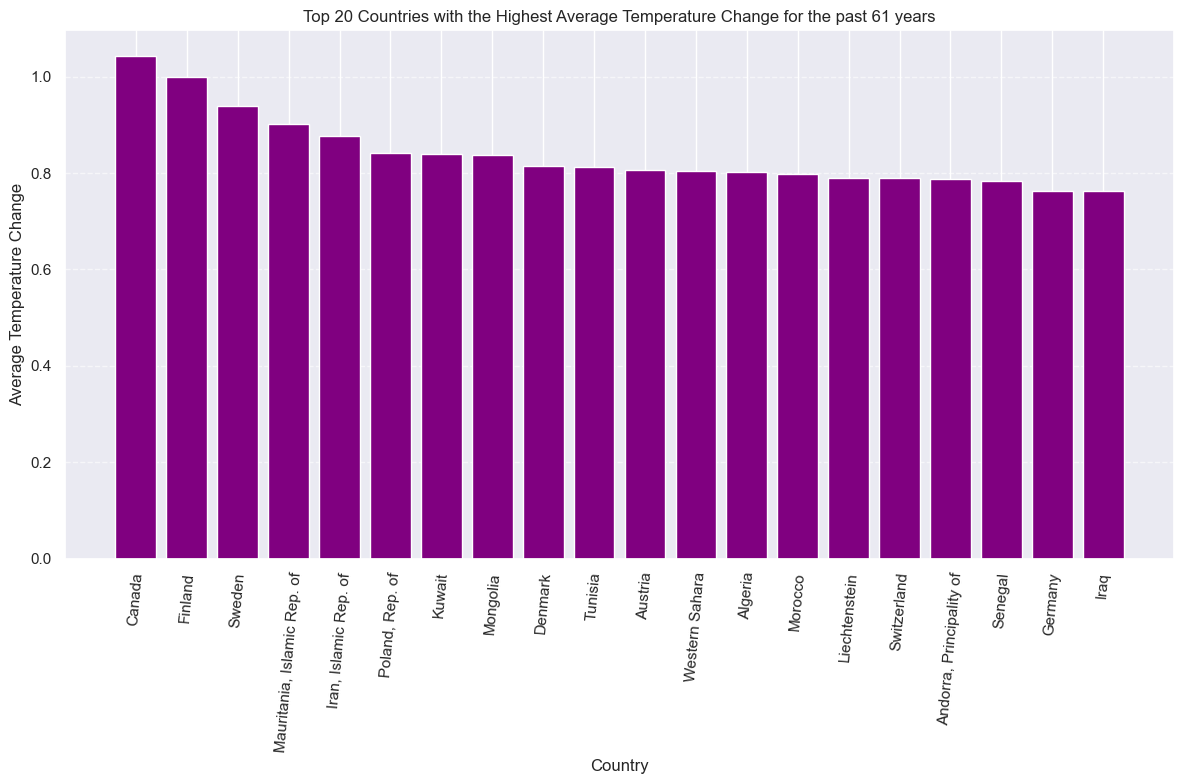

In [159]:

# Create a bar plot
plt.figure(figsize=(12, 8))
plt.bar(top_20_countries['Country'], top_20_countries['AverageTemperatureChange'], color='purple')
plt.xlabel('Country')
plt.ylabel('Average Temperature Change')
plt.title('Top 20 Countries with the Highest Average Temperature Change for the past 61 years')
plt.xticks(rotation=85)  # Rotate the x-axis 
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Display the plot
plt.tight_layout()
plt.show()


The provided data reveals the top 20 countries with the highest average temperature change for the past 61 years(1961-2020). Canada experiences the most significant increase in temperature, followed closely by Finland and Sweden.Countries from different continents, including Africa and the Middle East, also appear in the top rankings. This data highlights the widespread nature of temperature increases and the global impact of climate change, emphasizing the urgency of addressing environmental concerns and implementing measures to mitigate its effects. However, it's essential to acknowledge the absence of small island nations in the analysis, which are highly vulnerable to climate change's impacts, including rising sea levels and extreme weather events. Their exclusion underscores the need for a comprehensive approach to addressing climate change, considering the distinct challenges faced by these nations.

### Summary
In this project, I conducted an analysis of the "Annual_Surface_Temperature_Change.csv" dataset, examining annual surface temperature changes from 1961 to 2022 across various countries. The data reveals a consistent warming trend spanning several decades, aligning with the broader context of global climate change. Notably, Bahrain, Kingdom of, exhibited significant temperature increases during this period, while Botswana experienced noteworthy temperature decreases. These findings underscore the pressing need for urgent action to address the global impact of climate change and to pay particular attention to the vulnerabilities of nations most affected by these temperature fluctuations.

### Ideas for Future Research

- Future research could involve incorporating additional climate-related datasets to perform more comprehensive analyses if there is correlation beween annual temperature chnage and country's GPD. 
- Investigate the impact of temperature changes on specific ecosystems or regions, such as small Islands.

### References
- Include references to data sources, research papers, or relevant websites.

- https://jakevdp.github.io/PythonDataScienceHandbook/02.06-boolean-arrays-and-masks.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.04-missing-values.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
- the lecture notes from our class were also used in analysis
- dataset from https://climatedata.imf.org/datasets/4063314923d74187be9596f10d034914/explore